In [1]:
# Import modul
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emcee
import corner
import math
from astropy.cosmology import FlatLambdaCDM
from IPython.display import display, Math

D:\Documents\anaconda3\Lib\site-packages\cupy\_environment.py:217: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [2]:
# Data sebelumnya
data_old = {
    'Name': ["1990af", "1990O", "1992ac", "1992ag", "1992aq", "1992be", "1992bh", "1992bl", "1992bo", "1992bp", "1992br", "1992bs", "1992P", "1993ag", "1993B", "1993H", "19930", "1994M", "19945", "1995ac"],
    'z': [0.050, 0.031, 0.075, 0.026, 0.101, 0.020, 0.045, 0.043, 0.018, 0.079, 0.088, 0.063, 0.026, 0.050, 0.071, 0.025, 0.053, 0.024, 0.016, 0.049],
    'm_B': [17.723, 16.196, 18.392, 16.241, 19.299, 15.086, 17.592, 17.275, 15.753, 18.281, 19.398, 18.177, 16.037, 17.799, 18.377, 16.735, 17.614, 16.205, 14.760, 17.026],
    'm_B_err': [0.006, 0.023, 0.037, 0.021, 0.028, 0.007, 0.016, 0.033, 0.012, 0.011, 0.073, 0.041, 0.018, 0.014, 0.054, 0.017, 0.011, 0.041, 0.017, 0.014],
    'mu_B': [36.632, 35.532, 37.642, 35.353, 38.437, 34.494, 36.728, 36.276, 34.576, 37.465, 38.121, 37.540, 35.565, 36.827, 37.604, 35.192, 36.794, 35.228, 34.071, 35.494],
    'mu_B_err': [0.045, 0.091, 0.049, 0.094, 0.055, 0.111, 0.057, 0.059, 0.121, 0.041, 0.046, 0.046, 0.141, 0.060, 0.048, 0.092, 0.047, 0.094, 0.146, 0.085],
}

# Data baru dari gambar
data_new = {
    'Name': [
        "SNLS-03D1au", "SNLS-03D1aw", "SNLS-03D1ax", "SNLS-03D1bp", "SNLS-03D1cm", "SNLS-03D1ew", "SNLS-03D1fc", 
        "SNLS-03D1fi", "SNLS-03D1fq", "SNLS-03D1gf", "SNLS-03D1gt", "SNLS-03D1iv", "SNLS-03D1iy", "SNLS-03D1jg", 
        "SNLS-03D1la", "SNLS-03D1lh", "SNLS-03D1li", "SNLS-03D1lj", "SNLS-03D1ll", "SNLS-03D1lp", "SNLS-03D1lz", 
        "SNLS-03D1ma", "SNLS-03D1md", "SNLS-03D1me", "SNLS-03D1mr", "SNLS-03D1nh", "SNLS-03D1ny", "SNLS-03D1pc", 
        "SNLS-03D1pt", "SNLS-03D1qb", "SNLS-03D1qm", "SNLS-03D1qo", "SNLS-03D1qp", "SNLS-03D1qu", "SNLS-03D1qw", 
        "SNLS-03D1rb", "SNLS-03D1rr", "SNLS-03D1rv", "SNLS-03D1rw", "SNLS-03D1sb", "SNLS-03D1sj", "SNLS-03D1st", 
        "SNLS-03D1sv", "SNLS-03D1sw", "SNLS-03D1sx", "SNLS-03D1tb", "SNLS-03D1td", "SNLS-03D1th", "SNLS-03D1tj", 
        "SNLS-03D1tt", "SNLS-03D1ub", "SNLS-03D1ut", "SNLS-03D1wv", "SNLS-03D1xb", "SNLS-03D1xp", "SNLS-03D1yw"
    ],
    'z': [
        0.504, 0.582, 0.902, 0.887, 0.870, 0.861, 0.806, 0.681, 0.310, 0.890, 0.874, 0.460, 0.872, 0.735, 0.416, 0.493, 0.879, 
        0.735, 0.561, 0.902, 0.503, 0.834, 0.359, 0.644, 0.886, 0.491, 0.557, 0.651, 0.500, 0.605, 0.629, 0.702, 0.502, 0.852, 
        0.532, 0.454, 0.653, 0.636, 0.679, 0.748, 0.507, 0.429, 0.481, 0.651, 0.496, 0.616, 0.875, 0.583, 0.505, 0.775, 0.561, 
        0.699, 0.570, 0.523, 0.537, 0.599
    ],
    'm_B': [
        22.978, 22.599, 23.597, 24.507, 24.046, 24.359, 23.890, 23.649, 21.709, 23.970, 23.470, 22.010, 23.121, 23.281, 22.101, 
        22.558, 23.752, 23.307, 23.209, 24.053, 22.231, 23.685, 21.880, 23.417, 24.025, 22.147, 22.942, 23.329, 22.452, 22.657, 
        23.154, 23.597, 22.285, 24.011, 22.605, 22.153, 23.207, 23.090, 23.288, 23.563, 22.246, 22.137, 22.380, 23.277, 22.357, 
        22.945, 24.021, 23.176, 22.319, 23.507, 22.759, 23.365, 22.760, 22.487, 22.446, 22.987
    ],
    'm_B_err': [
        0.010, 0.020, 0.011, 0.009, 0.006, 0.006, 0.009, 0.015, 0.005, 0.007, 0.010, 0.007, 0.009, 0.008, 0.010, 0.013, 0.012, 
        0.005, 0.007, 0.010, 0.008, 0.007, 0.005, 0.009, 0.007, 0.009, 0.011, 0.010, 0.011, 0.006, 0.012, 0.011, 0.005, 0.006, 
        0.011, 0.008, 0.010, 0.008, 0.008, 0.007, 0.010, 0.007, 0.010, 0.008, 0.011, 0.006, 0.009, 0.011, 0.010, 0.008, 0.012, 
        0.010, 0.008, 0.008, 0.007, 0.010
    ],
    'mu_B': [
        42.429, 42.881, 43.818, 43.864, 44.095, 43.971, 43.681, 43.306, 43.044, 43.730, 43.457, 42.488, 43.191, 43.568, 41.861, 
        42.500, 43.799, 43.335, 43.459, 43.809, 42.394, 43.658, 43.105, 43.344, 43.662, 42.310, 42.871, 43.239, 42.599, 42.741, 
        43.061, 43.254, 42.353, 43.912, 42.859, 42.355, 43.204, 42.918, 43.212, 43.496, 42.418, 42.307, 42.592, 43.188, 42.565, 
        42.848, 43.855, 43.005, 42.547, 43.542, 42.939, 43.293, 42.853, 42.675, 42.698, 43.187
    ],
    'mu_B_err': [
        0.039, 0.054, 0.038, 0.037, 0.031, 0.034, 0.028, 0.048, 0.045, 0.028, 0.030, 0.045, 0.035, 0.038, 0.053, 0.039, 0.041, 
        0.028, 0.028, 0.033, 0.039, 0.026, 0.051, 0.037, 0.030, 0.039, 0.040, 0.046, 0.037, 0.039, 0.046, 0.048, 0.038, 0.031, 
        0.044, 0.037, 0.047, 0.043, 0.044, 0.041, 0.043, 0.041, 0.040, 0.038, 0.044, 0.034, 0.037, 0.045, 0.035, 0.043, 0.045, 
        0.045, 0.040, 0.042, 0.037, 0.048
    ]
}

# Menggabungkan data lama dan baru
data_combined = {
    'Name': data_old['Name'] + data_new['Name'],
    'z': data_old['z'] + data_new['z'],
    'm_B': data_old['m_B'] + data_new['m_B'],
    'm_B_err': data_old['m_B_err'] + data_new['m_B_err'],
    'mu_B': data_old['mu_B'] + data_new['mu_B'],
    'mu_B_err': data_old['mu_B_err'] + data_new['mu_B_err'],
}

df = pd.DataFrame(data_combined)
print(df)

           Name      z     m_B  m_B_err    mu_B  mu_B_err
0        1990af  0.050  17.723    0.006  36.632     0.045
1         1990O  0.031  16.196    0.023  35.532     0.091
2        1992ac  0.075  18.392    0.037  37.642     0.049
3        1992ag  0.026  16.241    0.021  35.353     0.094
4        1992aq  0.101  19.299    0.028  38.437     0.055
..          ...    ...     ...      ...     ...       ...
71  SNLS-03D1ut  0.699  23.365    0.010  43.293     0.045
72  SNLS-03D1wv  0.570  22.760    0.008  42.853     0.040
73  SNLS-03D1xb  0.523  22.487    0.008  42.675     0.042
74  SNLS-03D1xp  0.537  22.446    0.007  42.698     0.037
75  SNLS-03D1yw  0.599  22.987    0.010  43.187     0.048

[76 rows x 6 columns]


In [3]:
# MCMC
def main(p0, nwalkers, niter, ndim, ln_posterior, data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=data)

    print("Running burn-in...")
    p0 = sampler.run_mcmc(p0, 500, progress=True) #500 iterasi pertama ditetapkan sebagai burn-in
    sampler.reset() #reset sampler sebelum melakukan iterasi utama

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter, progress=True)

    return sampler, pos, prob, state

In [4]:
# Definisi model
def luminosity_distance(H0, Om0, z):
    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)
    return cosmo.luminosity_distance(z).value

def distance_modulus(H0, Om0, z):
    dl = luminosity_distance(H0, Om0, z)
    return 5 * np.log10(dl * 1e6 / 10)  # Convert Mpc to pc

In [5]:
# Definisi log-likelihood
def log_likelihood(theta, z, mu, mu_err):
    H0, Om0 = theta
    model_mu = distance_modulus(H0, Om0, z)
    sigma2 = mu_err ** 2
    return -0.5 * np.sum((mu - model_mu) ** 2 / sigma2 + np.log(sigma2))

# Definisi prior
def log_prior(theta):
    H0, Om0 = theta
    if 50 < H0 < 80 and 0.0 < Om0 < 0.5:
        return 0.0
    return -np.inf

# Definisi posterior
def log_posterior(theta, z, mu, mu_err):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, z, mu, mu_err)

# Initial guess
initial = np.array([70, 0.3])
nwalkers = 50
ndim = len(initial)
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(df["z"].to_numpy(), df["mu_B"].to_numpy(), df["mu_B_err"].to_numpy()))
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [05:46<00:00, 14.44it/s]


State([[62.13338822  0.39050206]
 [62.22809046  0.38350965]
 [61.65457627  0.40224957]
 [62.33672071  0.37983935]
 [62.12460543  0.37647063]
 [62.20130215  0.38347424]
 [62.21449807  0.37997249]
 [62.21552705  0.38619315]
 [61.88852288  0.39696427]
 [62.35966063  0.37049886]
 [62.61579848  0.37144978]
 [62.40998092  0.3749784 ]
 [62.50820338  0.3829938 ]
 [61.2919135   0.42500052]
 [60.98034774  0.44252825]
 [62.61607882  0.37212337]
 [62.28391094  0.38014061]
 [61.98093617  0.39061281]
 [62.46156855  0.37418464]
 [62.05947624  0.38338983]
 [61.83983497  0.40225454]
 [62.18798912  0.3837254 ]
 [62.27634846  0.38685179]
 [61.65006422  0.41084812]
 [62.58600223  0.37885452]
 [61.81303289  0.4032151 ]
 [62.02047882  0.38532123]
 [62.50107273  0.37943272]
 [62.52470612  0.37132537]
 [62.69083161  0.36397197]
 [62.72798026  0.3741802 ]
 [62.51791317  0.37599072]
 [62.69271501  0.3680538 ]
 [61.60392202  0.41802575]
 [62.06255651  0.40041828]
 [61.8594915   0.40305095]
 [62.2061453   0.39168

<>:5: SyntaxWarning: invalid escape sequence '\O'
<>:5: SyntaxWarning: invalid escape sequence '\O'
C:\Users\USER\AppData\Local\Temp\ipykernel_8664\2944196655.py:5: SyntaxWarning: invalid escape sequence '\O'
  labels = ["$H_0$", "$\Omega_m$"]


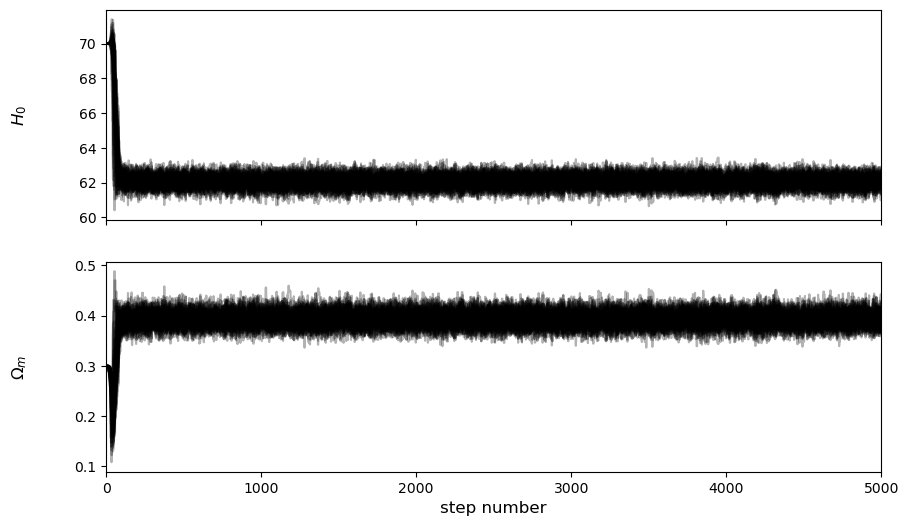

In [6]:
# Membuat plot masing-masing parameter (MCMC chains) untuk mengecek konvergensi
fig, axes = plt.subplots(ndim, figsize=(10, 6), sharex=True)
ndim = 2
samples = sampler.get_chain()
labels = ["$H_0$", "$\Omega_m$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i], fontsize=12)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number", fontsize=12);

<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\O'
C:\Users\USER\AppData\Local\Temp\ipykernel_8664\70699195.py:2: SyntaxWarning: invalid escape sequence '\O'
  labels = ["$H_0$", "$\Omega_m$"]


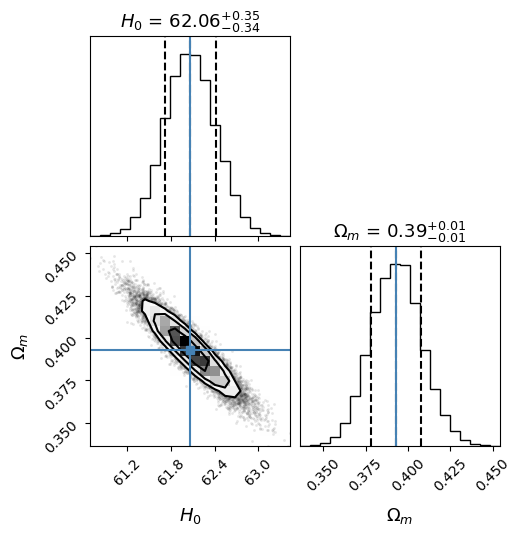

In [7]:
flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
labels = ["$H_0$", "$\Omega_m$"]

H0 = np.median(flat_samples[:, 0])
Om0 = np.median(flat_samples[:, 1])

fig = corner.corner(flat_samples,show_titles=True,title_kwargs={"fontsize":13},labels=labels,label_kwargs={"fontsize":13},plot_datapoints=True,truths=[H0, Om0],quantiles=[0.16, 0.5, 0.84],dpi=200)
fig.savefig("corner_H0_Om0.png", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
# Definisi untuk model flat lambda CDM
model_mu = distance_modulus(H0, Om0, df["z"].to_numpy())

In [9]:
# Hasil H_0 dan Omega_0
labels = ["H_0", "\Omega_m"]
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\USER\AppData\Local\Temp\ipykernel_8664\2078958259.py:2: SyntaxWarning: invalid escape sequence '\O'
  labels = ["H_0", "\Omega_m"]
C:\Users\USER\AppData\Local\Temp\ipykernel_8664\2078958259.py:6: SyntaxWarning: invalid escape sequence '\m'
  txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}"


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
# Hasil reduced chi-squared
chisq = 0.
for i in range(len(data_combined)):
    chisq = chisq + (((model_mu[i] - df.mu_B[i])*2)/(df.mu_B_err[i])*2)
ndim=2

red_chisq = chisq/(len(data_combined) - ndim) #reduced chi squared
txt2 = "\mathrm\chi_{{\\nu}}^2 = {0:.3f}".format(red_chisq)
display(Math(txt2))

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\USER\AppData\Local\Temp\ipykernel_8664\995316385.py:8: SyntaxWarning: invalid escape sequence '\m'
  txt2 = "\mathrm\chi_{{\\nu}}^2 = {0:.3f}".format(red_chisq)


<IPython.core.display.Math object>

In [11]:
z1 = np.linspace(0.001,0.9,1000)
model_mu1 = distance_modulus(H0, Om0, z1)

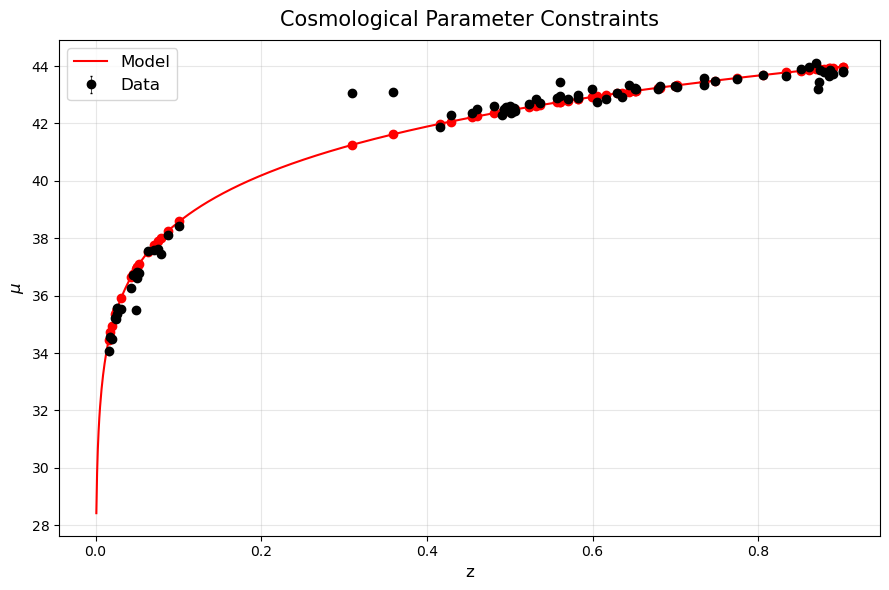

In [12]:
# Hasil plot model vs data
plt.figure(figsize=(9, 6))
plt.plot(z1, model_mu1, label='Model', c='red', linewidth=1.5)
plt.plot(df.z, model_mu, 'o', c='red')  # Points
plt.errorbar(df.z, df.mu_B, yerr=df.mu_B_err, label='Data', elinewidth=0.5, fmt='ko', capsize=1)
plt.title('Cosmological Parameter Constraints', pad=10, size=15)

# plt.ylim(0,); plt.xlim(0,)
plt.xlabel('z', size=12)
plt.ylabel(r'$\mu$', size=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.grid(alpha=0.3)
plt.savefig("constraint parameter kosmologi.png", dpi=300)
plt.show()

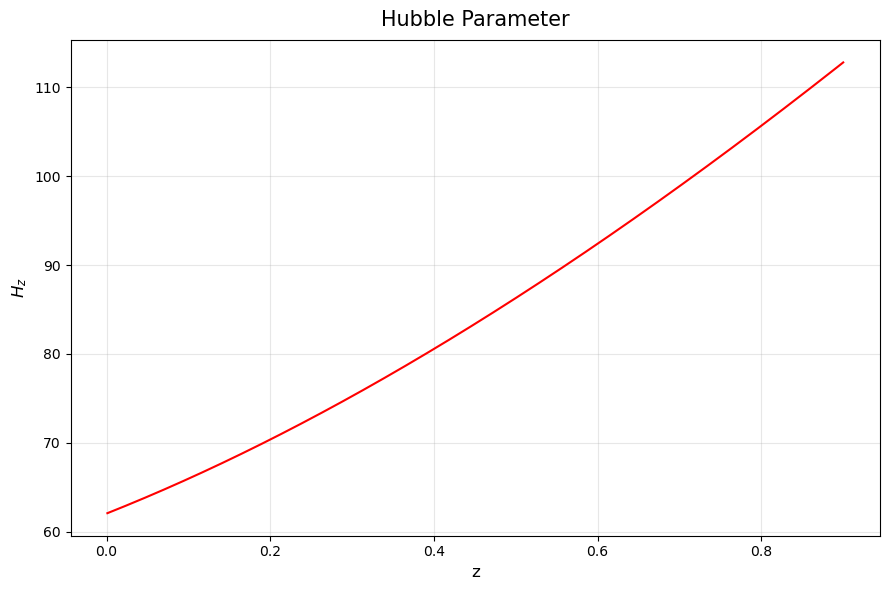

In [13]:
# Menghitung Hubble parameter
Hz = H0 * np.sqrt(Om0 * (1 + z1) ** 3 + (1 - Om0))

# Plot Hubble parameter
plt.figure(figsize=(9, 6))
plt.plot(z1, Hz, c='red', linewidth=1.5)  # Line connecting the points
plt.title('Hubble Parameter', pad=10, size=15)
plt.xlabel('z', size=12)
plt.ylabel(r'$H_z$', size=12)
plt.tight_layout()
plt.grid(alpha=0.3)
plt.savefig("parameter hubble.png", dpi=300)
plt.show()